In [2]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [146]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [ ]:
Численные - children, salary, age, home_cost, happyness
Категориальные - was_married, sex, Profession, drive_info
Нормального распределения - нет ни у одного признака
Бессмысленные:
- age (нет значений с 34 до 80),
- salary, home_cost (странные значения в десятки и сотни миллионов)

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [147]:
data.drop_duplicates(keep='first', inplace=True)
data.dropna(how='any',inplace=True)

In [148]:
data['children'] = data['children'].astype(int)
data['salary'] = data['salary'].astype(int)
data['age'] = data['age'].astype(int)
data['home_cost'] = data['home_cost'].astype(int)
data['drive_info'] = data['drive_info'].astype(int, errors = 'ignore')
data['happyness'] = (data['happyness'] * 100).astype(int)
data.head()

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
1,1,2,173748959,1,32,Doctor,10140513,0,38
5,1,3,2474979,0,21,Homemaker,10016535,1,32
7,1,2,151408583,1,32,Doctor,10226684,1,40
8,1,1,12841162,1,9,Marketing,10173613,1,33
10,1,9,152437794,1,100,Artist,10376836,1,77


In [127]:
print('Минимум: ',data['home_cost'].min())
print('Максимум: ',data['home_cost'].max())

Минимум:  9838047
Максимум:  20657915


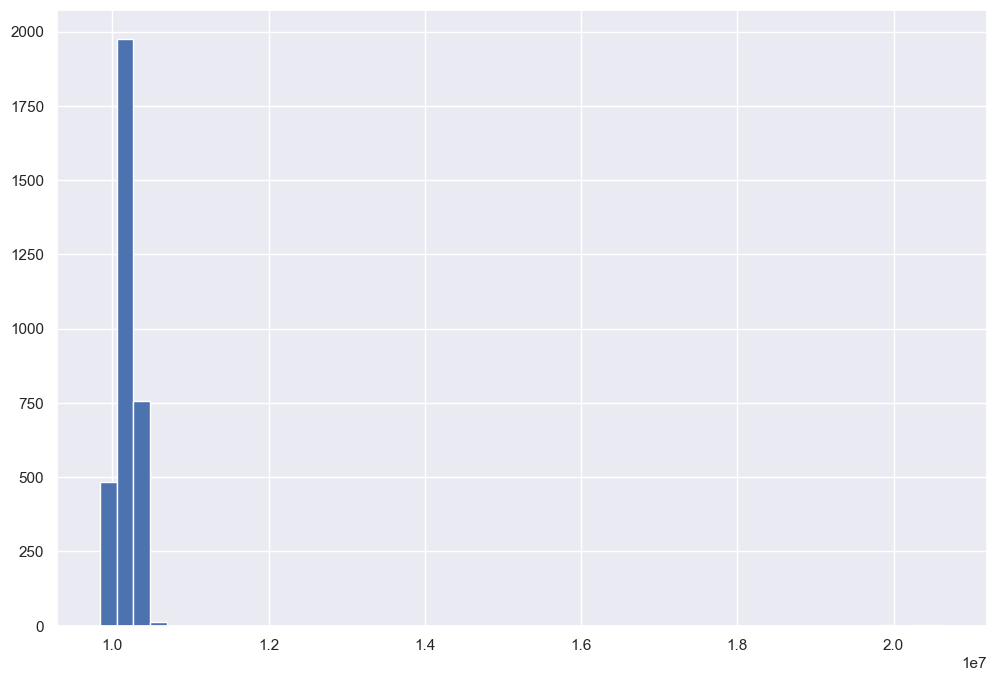

In [149]:
plt.figure(figsize=(12, 8))
plt.hist(data['home_cost'], bins = 50)
plt.show()

# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

55198205
98601242


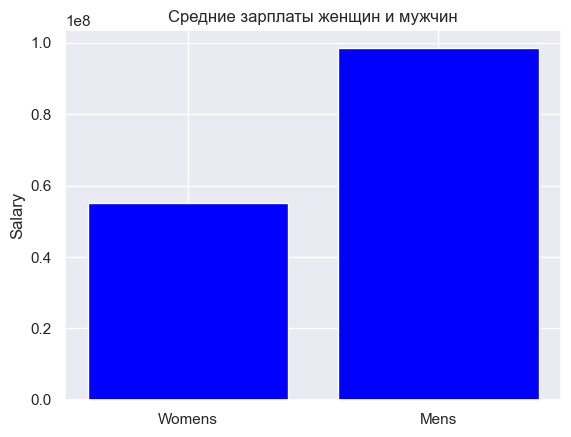

In [172]:
compare_1_1 = data.loc[data['sex'] == 0]['salary'].mean().astype(int)
compare_1_2 = data.loc[data['sex'] == 1]['salary'].mean().astype(int)

using = ['Womens', 'Mens']
visualization = [compare_1_1, compare_1_2]
plt.bar(using, visualization, color = 'blue')
plt.ylabel('Salary')
plt.title('Средние зарплаты женщин и мужчин')
print(compare_1_1)
print(compare_1_2)
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

42251422
195255543


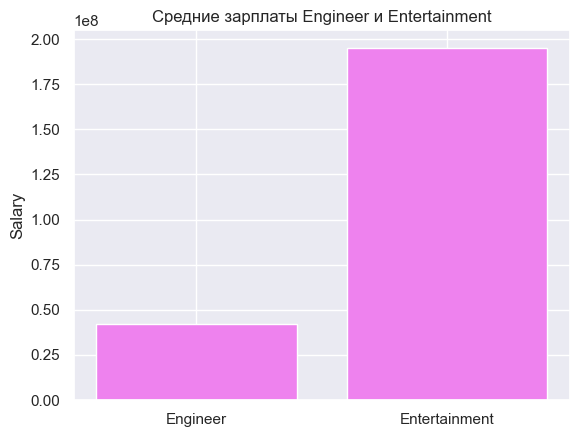

In [173]:
compare_2_1 = data.loc[data['profession'] == 'Engineer']['salary'].mean().astype(int)
compare_2_2 = data.loc[data['profession'] == 'Entertainment']['salary'].mean().astype(int)

using = ['Engineer', 'Entertainment']
visualization = [compare_2_1, compare_2_2]
plt.bar(using, visualization, color = 'violet')
plt.ylabel('Salary')
plt.title('Средние зарплаты Engineer и Entertainment')
print(compare_2_1)
print(compare_2_2)
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

117448634
66938956


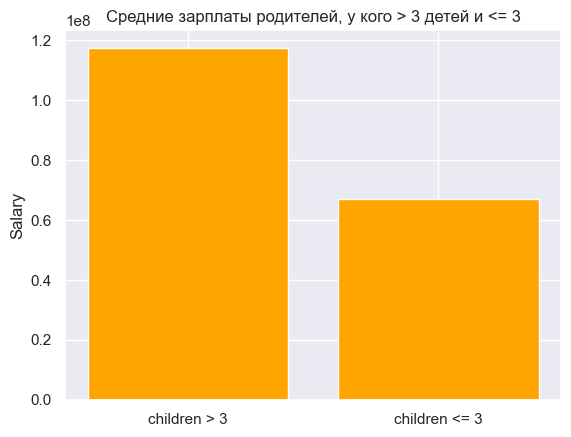

In [174]:
compare_3_1 = data.loc[data['children'] > 3]['salary'].mean().astype(int)
compare_3_2 = data.loc[data['children'] <= 3]['salary'].mean().astype(int)

using = ['children > 3', 'children <= 3']
visualization = [compare_3_1, compare_3_2]
plt.bar(using, visualization, color = 'orange')
plt.ylabel('Salary')
plt.title('Средние зарплаты родителей, у кого > 3 детей и <= 3')
print(compare_3_1)
print(compare_3_2)
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

Странно сформулирован вопрос, в нем два взаимоисключающих условия. Вопрос должен звучать как:
"Правда ли, что художники (Artist) живут в домах, которые в среднем дороже, чем дома адвокатов (Lawyer)?"
или так:
"Художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?"
На первый вопрос ответ "Нет, неправда", на второй - "Дешевле"

10216333
10273002


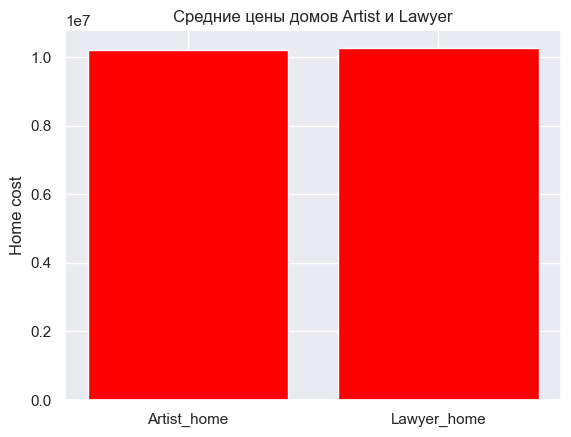

In [175]:
compare_4_1 = data.loc[data['profession'] == 'Artist']['home_cost'].mean().astype(int)
compare_4_2 = data.loc[data['profession'] == 'Lawyer']['home_cost'].mean().astype(int)

using = ['Artist_home', 'Lawyer_home']
visualization = [compare_4_1, compare_4_2]
plt.bar(using, visualization, color = 'red')
plt.ylabel('Home cost')
plt.title('Средние цены домов Artist и Lawyer')
print(compare_4_1)
print(compare_4_2)
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


10180165
10279730


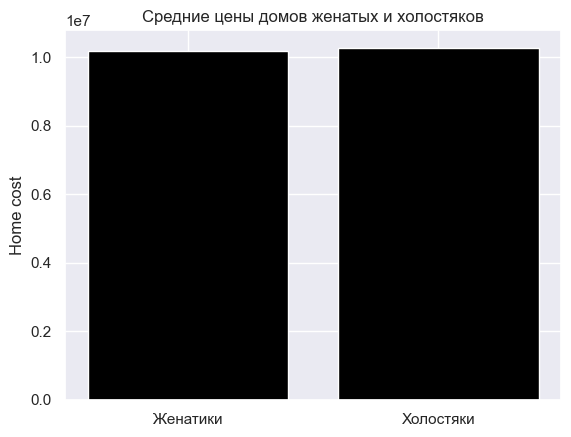

In [176]:
compare_5_1 = data.loc[data['was_married'] == 1]['home_cost'].mean().astype(int)
compare_5_2 = data.loc[data['was_married'] == 0]['home_cost'].mean().astype(int)

using = ['Женатики', 'Холостяки']
visualization = [compare_5_1, compare_5_2]
plt.bar(using, visualization, color = 'black')
plt.ylabel('Home cost')
plt.title('Средние цены домов женатых и холостяков')
print(compare_5_1)
print(compare_5_2)
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [6]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [208]:
compare_temp = data.groupby(['sex', 'was_married']).count()
compare_temp.head()

children  salary   age  profession  home_cost  drive_info  \
sex was_married                                                              
0   0                 360     360   360         360        360         360   
    1                 779     779   779         779        779         779   
1   0                 145     145   145         145        145         145   
    1                1946    1946  1946        1946       1946        1946   

                 happyness  
sex was_married             
0   0                  360  
    1                  779  
1   0                  145  
    1                 1946

1946
779


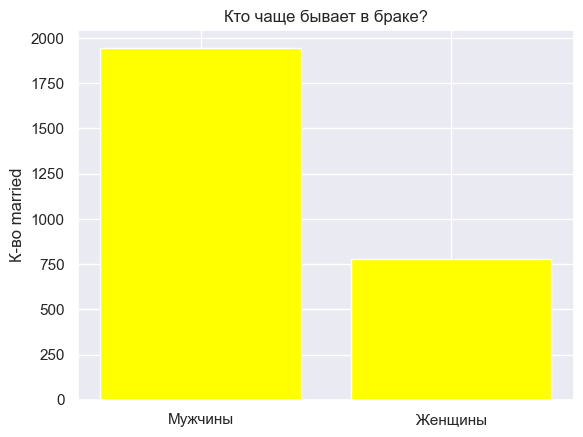

In [209]:
compare_6_1 = 1946
compare_6_2 = 779

using = ['Мужчины', 'Женщины']
visualization = [compare_6_1, compare_6_2]
plt.bar(using, visualization, color = 'yellow')
plt.ylabel('К-во married')
plt.title('Кто чаще бывает в браке?')
print(compare_6_1)
print(compare_6_2)
plt.show()